# **Part B: Customer Churn Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('Customer_data.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Unnamed: 22
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,NaN,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN,NaN
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Unnamed: 21,Unnamed: 22
count,7043.000000,7043.000000,7043.000000,7032.000000,0.0,0.0
mean,0.162147,32.371149,64.761692,2283.300441,NaN,NaN
std,0.368612,24.559481,30.090047,2266.771362,NaN,NaN
min,0.000000,0.000000,18.250000,18.800000,NaN,NaN
25%,0.000000,9.000000,35.500000,401.450000,NaN,NaN
50%,0.000000,29.000000,70.350000,1397.475000,NaN,NaN
75%,0.000000,55.000000,89.850000,3794.737500,NaN,NaN
max,1.000000,72.000000,118.750000,8684.800000,NaN,NaN


In [9]:
data.fillna(data.ffill(), inplace=True)

data = pd.get_dummies(data, drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [21]:
if 'Churn' in data.columns:
    data = pd.get_dummies(data, columns=['Churn'], prefix='Churn', drop_first=True)
    print(data.columns)  # Check new columns to verify

# Adjusted column access after encoding
X = data.drop('Churn_Yes', axis=1)  # Assuming 'Churn_Yes' is the correct column name after encoding
y = data['Churn_Yes']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Fit the model on training data and making predictions
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions))
print('Recall:', recall_score(y_test, predictions))
print('F1 Score:', f1_score(y_test, predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))


Accuracy: 0.7984386089425124
Precision: 0.6893617021276596
Recall: 0.4343163538873995
F1 Score: 0.5328947368421053
Confusion Matrix:
 [[963  73]
 [211 162]]


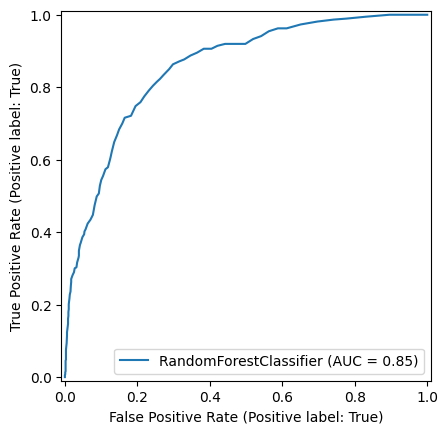

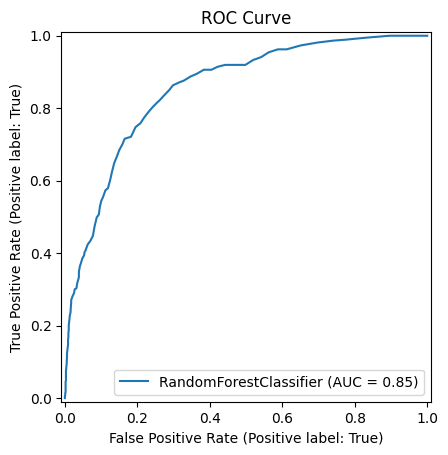

In [27]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(model, X_test, y_test).plot()
plt.title('ROC Curve')
plt.show()